In [15]:
import pickle
import numpy as np
from scipy.spatial.distance import cdist
from cls_factorizable_funcs import *

category='car'
target='bus'
adv_case = False
K = 4
magic_thh = 0.47
file_path = '/export/home/qliu24/VC_adv_data/qing/VGG_adv/feat/'
if adv_case:
    feat_fname = file_path + 'pool4FeatVC_adv_{}_{}.pickle'.format(category, target)
else:
    feat_fname = file_path + 'pool4FeatVC_{}_test.pickle'.format(category)
    
dict_file='/export/home/qliu24/qing_voting_139/qing_voting_py/data/dictionary_PASCAL3D+_all_VGG16_pool4_K200_vMFMM30.pickle'
model_category = file_path + 'mix_model/{}_K{}_notrain.pickle'.format(category, K)
model_target = file_path + 'mix_model/{}_K{}_notrain.pickle'.format(target, K)

with open(feat_fname, 'rb') as fh:
    layer_feature= pickle.load(fh)

if adv_case:
    layer_feature = layer_feature[1]
    
# layer_feature = layer_feature[1000:]

with open(dict_file, 'rb') as fh:
    _, centers, _ = pickle.load(fh)
     
with open(model_category, 'rb') as fh:
    all_weights_category, _ = pickle.load(fh)
    
assert(len(all_weights_category) == K)
all_logZs_category = []
for kk in range(K):
    all_logZs_category.append(np.sum(np.log(1+np.exp(all_weights_category[kk]))))
    
with open(model_target, 'rb') as fh:
    all_weights_target, _ = pickle.load(fh)
    
assert(len(all_weights_target) == K)
all_logZs_target = []
for kk in range(K):
    all_logZs_target.append(np.sum(np.log(1+np.exp(all_weights_target[kk]))))

N = len(layer_feature)
print('total number of samples to test: {}'.format(N))
r_set = [None for nn in range(N)]
for nn in range(N):
    iheight,iwidth = layer_feature[nn].shape[0:2]
    lff = layer_feature[nn].reshape(-1, 512)
    lff_norm = lff/np.sqrt(np.sum(lff**2, 1)).reshape(-1,1)
    r_set[nn] = cdist(lff_norm, centers, 'cosine').reshape(iheight,iwidth,-1)
    
layer_feature_b = [None for nn in range(N)]
for nn in range(N):
    layer_feature_b[nn] = (r_set[nn]<magic_thh).astype(int)
    

total number of samples to test: 1000


In [16]:
labels = []
scores = []
false_ls = []
for nn in range(N):
    if nn%50==0:
        print('sample {}'.format(nn))
        
    lfb = layer_feature_b[nn]
    rst = predictLabel(lfb, all_weights_category, all_logZs_category, all_weights_target, all_logZs_target)
    labels.append(rst[0])
    scores.append(rst[1])
    if rst[0]==0:
        false_ls.append(nn)
    
print(np.sum(labels)/N)
print(len(false_ls))
print(np.mean(scores),np.std(scores))

sample 0
sample 50
sample 100
sample 150
sample 200
sample 250
sample 300
sample 350
sample 400
sample 450
sample 500
sample 550
sample 600
sample 650
sample 700
sample 750
sample 800
sample 850
sample 900
sample 950
0.006
994
1124.0423664 599.94560763


In [ ]:
959.152495746 527.160423649

total number of images: 498


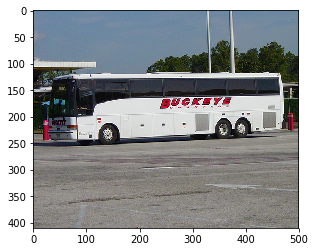

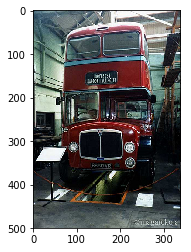

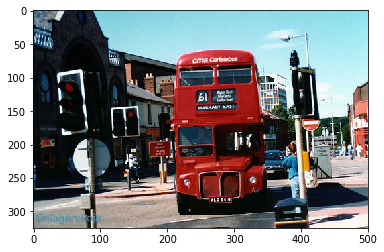

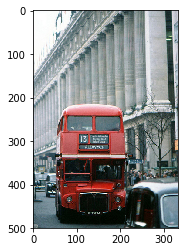

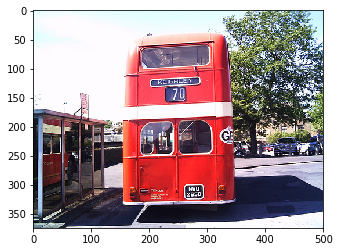

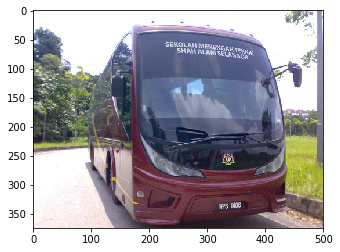

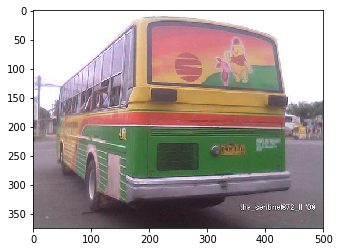

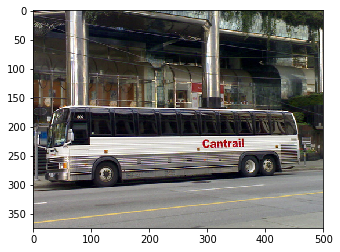

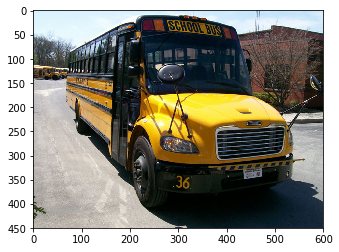

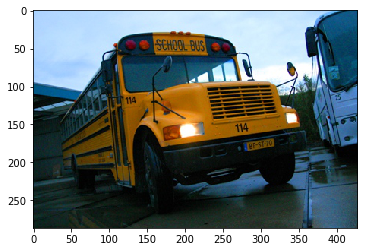

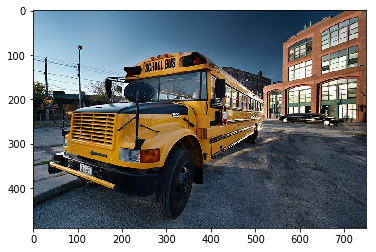

In [18]:
import scipy.io as sio
import os
import matplotlib.pyplot as plt
import cv2

dataset_suffix = 'mergelist_rand'
Dataset = dict()
Dataset['img_dir'] = '/export/home/qliu24/dataset/PASCAL3D+_release1.1/Images/{0}_imagenet/'
Dataset['anno_dir'] = '/export/home/qliu24/dataset/PASCAL3D+_release1.1/Annotations/{0}_imagenet/'
Dataset['gt_dir'] = '/export/home/qliu24/qing_voting_139/qing_voting_py/intermediate/ground_truth_data/'
Dataset['train_list'] = os.path.join(Dataset['gt_dir'], '{0}_'+ '{0}_train.txt'.format(dataset_suffix))
Dataset['test_list'] = os.path.join(Dataset['gt_dir'], '{0}_'+ '{0}_test.txt'.format(dataset_suffix))
Dataset['adv_dir'] = '/export/home/qliu24/VC_adv_data/qing/VGG_adv/{}_{}'

category='bus'
set_type = 'test'
dir_anno = Dataset['anno_dir'].format(category)
file_list = Dataset['{}_list'.format(set_type)].format(category)
with open(file_list, 'r') as fh:
    content = fh.readlines()
    
img_list = [x.strip().split() for x in content]
img_num = len(img_list)
print('total number of images: {0}'.format(img_num))

for nn in false_ls:
    img_dir = Dataset['img_dir'].format(category)
    file_img = os.path.join(img_dir, '{0}.JPEG'.format(img_list[nn][0]))
    assert(os.path.isfile(file_img))
    # matcontent = sio.loadmat(file_mat)
    img = cv2.imread(file_img)
    plt.imshow(img[:,:,[2,1,0]])
    plt.show()

In [8]:
false_ls

[93, 125, 242, 386, 403, 785]

In [22]:
false_ls

[93, 125, 242, 386, 403, 785]